# Assignment-6 Implement SGD for linear regression.

## 1. Loading the Boston price data set & generating train & test dataframes

In [1]:
import warnings
warnings.filterwarnings("ignore")
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
print(boston.data.shape)
print(boston.feature_names)
print(boston.target)

(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 

In [4]:
import pandas as pd
bos = pd.DataFrame(boston.data)
print(bos.head())

         0     1     2    3      4      5     6       7    8      9    10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [5]:
bos.columns.values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [6]:
bos['PRICE'] = boston.target

In [7]:
bos.columns.values

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 'PRICE'], dtype=object)

In [8]:
bos.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [9]:
bos['PRICE'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: PRICE, dtype: float64

In [10]:
X=bos.drop('PRICE', axis = 1)
Y = bos['PRICE']

### 1.1 Splitting the data

In [11]:
# splitting the data frame into train & test
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


### 1.2 Standardizing the train & test data

In [23]:
#standardizing Xi's
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
scaler1.fit(X_train)
X_train_std=scaler1.transform(X_train)
X_test_std=scaler1.transform(X_test)

print("After Standardization")
print(X_train_std.shape)
print(X_test_std.shape)

After Standardization
(339, 13)
(167, 13)


In [24]:
#standardizing Yi's
from sklearn.preprocessing import StandardScaler
scaler2 = StandardScaler()
scaler2.fit(Y_train.values.reshape(-1,1))
Y_train_std=scaler2.transform((Y_train).values.reshape(-1,1))
Y_test_std=scaler2.transform((Y_test).values.reshape(-1,1))

print("After Standardization")
print(Y_train_std.shape)
print(Y_test_std.shape)

After Standardization
(339, 1)
(167, 1)


#### 1.2.1 Creating dataframes for train & test data using standardized values

#### 1.2.1.1 To create train_data

In [25]:
#create df for X_train data
df1 = pd.DataFrame(X_train_std, columns=['CRIM','ZN', 'INDUS', 'CHAS', 'NOX', 'RM','AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
 'B', 'LSTAT'])
#df.head(5)
df1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.911839,-0.502419,1.072305,-0.256978,1.633548,0.486034,0.962774,-0.823477,1.655334,1.552100,0.808078,-2.842959,1.523203
1,-0.411727,-0.502419,-1.129795,-0.256978,-0.552451,1.028078,0.668619,-0.183274,-0.871371,-0.802704,-0.304174,0.427436,-0.995240
2,0.124583,-0.502419,1.072305,-0.256978,1.441946,-3.913414,0.725324,-1.075955,1.655334,1.552100,0.808078,-0.053353,-0.765646
3,-0.406208,0.839388,-0.901940,-0.256978,-1.083710,0.097426,-0.515087,1.600509,-0.411970,-0.624310,-0.860301,0.152292,-0.184576
4,0.021742,-0.502419,1.072305,-0.256978,1.398401,0.123238,0.743044,-0.605107,1.655334,1.552100,0.808078,0.365116,0.301538


In [26]:
#create df for Y_train data
df2=pd.DataFrame(Y_train_std, columns=['PRICE'])
df2.head()

,PRICE
0,-1.022679
1,0.118958
2,0.555465
3,-0.037738
4,-0.541401


In [27]:
#concatenate df1 & df2 to get train_data
train_data=pd.concat([df1,df2],axis=1)
train_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.911839,-0.502419,1.072305,-0.256978,1.633548,0.486034,0.962774,-0.823477,1.655334,1.552100,0.808078,-2.842959,1.523203,-1.022679
1,-0.411727,-0.502419,-1.129795,-0.256978,-0.552451,1.028078,0.668619,-0.183274,-0.871371,-0.802704,-0.304174,0.427436,-0.995240,0.118958
2,0.124583,-0.502419,1.072305,-0.256978,1.441946,-3.913414,0.725324,-1.075955,1.655334,1.552100,0.808078,-0.053353,-0.765646,0.555465
3,-0.406208,0.839388,-0.901940,-0.256978,-1.083710,0.097426,-0.515087,1.600509,-0.411970,-0.624310,-0.860301,0.152292,-0.184576,-0.037738
4,0.021742,-0.502419,1.072305,-0.256978,1.398401,0.123238,0.743044,-0.605107,1.655334,1.552100,0.808078,0.365116,0.301538,-0.541401


In [28]:
train_data.shape

(339, 14)

In [29]:
train_data.shape[0]

339

#### 1.2.1.2 To create test_data

In [30]:
#create df for X_test data
df3 = pd.DataFrame(X_test_std, columns=['CRIM','ZN', 'INDUS', 'CHAS', 'NOX', 'RM','AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
 'B', 'LSTAT'])
df3.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.372923,-0.502419,-0.711561,-0.256978,-0.421814,2.509379,0.675707,-0.284956,-0.182270,-0.582684,-0.489550,0.318974,-1.331126
1,-0.414165,3.075732,-0.898942,-0.256978,-1.231765,0.487468,-1.560575,0.653383,-0.641670,-0.951366,0.344640,0.427436,-1.108619
2,-0.412891,-0.502419,-1.129795,-0.256978,-0.552451,0.182031,-0.047275,-0.345867,-0.871371,-0.802704,-0.304174,0.373661,-0.526132
3,0.905605,-0.502419,1.072305,-0.256978,1.006488,-1.984712,1.154151,-1.292647,1.655334,1.552100,0.808078,0.427436,3.153033
4,-0.392026,0.392119,-0.597633,3.891382,-0.770180,2.008920,-0.554071,0.283082,-0.756521,-1.082188,0.066577,0.357596,-0.842177


In [31]:
#create df for Y_test data
df4=pd.DataFrame(Y_test_std, columns=['PRICE'])
df4.head()

,PRICE
0,1.685909
1,0.600236
2,0.007032
3,-0.977908
4,1.417289


In [32]:
#concatenate df3 & df4 to get test_data
test_data=pd.concat([df3,df4],axis=1)
test_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,-0.372923,-0.502419,-0.711561,-0.256978,-0.421814,2.509379,0.675707,-0.284956,-0.182270,-0.582684,-0.489550,0.318974,-1.331126,1.685909
1,-0.414165,3.075732,-0.898942,-0.256978,-1.231765,0.487468,-1.560575,0.653383,-0.641670,-0.951366,0.344640,0.427436,-1.108619,0.600236
2,-0.412891,-0.502419,-1.129795,-0.256978,-0.552451,0.182031,-0.047275,-0.345867,-0.871371,-0.802704,-0.304174,0.373661,-0.526132,0.007032
3,0.905605,-0.502419,1.072305,-0.256978,1.006488,-1.984712,1.154151,-1.292647,1.655334,1.552100,0.808078,0.427436,3.153033,-0.977908
4,-0.392026,0.392119,-0.597633,3.891382,-0.770180,2.008920,-0.554071,0.283082,-0.756521,-1.082188,0.066577,0.357596,-0.842177,1.417289


In [33]:
test_data.shape

(167, 14)

## 2. Implementing own version of SGD

#### Reference: https://machinelearningmastery.com/implement-linear-regression-stochastic-gradient-descent-scratch-python/

### 2.1 To find best coefficients from Train data

In [34]:
# Make a prediction with coefficients
def predict(row, coefficients):
    yhat = coefficients[0]
    for i in range(len(row)-1):
        yhat += coefficients[i + 1] * row[i]
    return yhat

In [35]:
# Estimate linear regression coefficients for train data using stochastic gradient descent

def coefficients_sgd(train, l_rate, n_epoch):
    MSE_list=[]
    coef = [0.0 for i in range(14)]
    for epoch in range(n_epoch):
        sum_error = 0
        for row in (train.values):
            yhat = predict(row, coef)
            error = yhat - row[-1]
            sum_error += error**2
            coef[0] = coef[0] - l_rate * error #corresponds to b0 or w0
            for i in range(len(row)-1):
                coef[i + 1] = coef[i + 1] - l_rate * error * row[i] #corresponds to bi or wi
        print('For epoch=%d:, lrate=%.8f error=%.3f' % (epoch,l_rate,((sum_error)/train_data.shape[0])))
        l_rate=l_rate/2;
        MSE_list.append((sum_error)/(train_data.shape[0]))
    return coef, MSE_list

# Calculate coefficients
dataset = train_data
l_rate = 0.01
n_epoch = 100
coef, MSE_list = coefficients_sgd(dataset, l_rate, n_epoch)
print(coef)

For epoch=0:, lrate=0.01000000 error=0.357
For epoch=1:, lrate=0.00500000 error=0.280
For epoch=2:, lrate=0.00250000 error=0.266
For epoch=3:, lrate=0.00125000 error=0.259
For epoch=4:, lrate=0.00062500 error=0.255
For epoch=5:, lrate=0.00031250 error=0.253
For epoch=6:, lrate=0.00015625 error=0.252
For epoch=7:, lrate=0.00007813 error=0.252
For epoch=8:, lrate=0.00003906 error=0.252
For epoch=9:, lrate=0.00001953 error=0.251
For epoch=10:, lrate=0.00000977 error=0.251
For epoch=11:, lrate=0.00000488 error=0.251
For epoch=12:, lrate=0.00000244 error=0.251
For epoch=13:, lrate=0.00000122 error=0.251
For epoch=14:, lrate=0.00000061 error=0.251
For epoch=15:, lrate=0.00000031 error=0.251
For epoch=16:, lrate=0.00000015 error=0.251
For epoch=17:, lrate=0.00000008 error=0.251
For epoch=18:, lrate=0.00000004 error=0.251
For epoch=19:, lrate=0.00000002 error=0.251
For epoch=20:, lrate=0.00000001 error=0.251
For epoch=21:, lrate=0.00000000 error=0.251
For epoch=22:, lrate=0.00000000 error=0.25

### 2.2 Plotting Epochs vs Mean squared error(MSE)

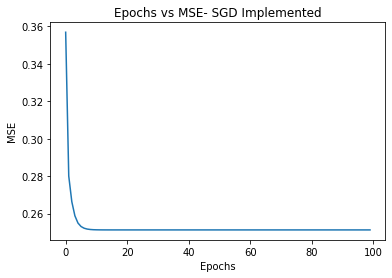

In [36]:
#Plot of epochs vs Mean squared error

plt.plot(range(0,100), MSE_list)
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.title("Epochs vs MSE- SGD Implemented")
plt.show()

In [37]:
# To get the coefficients when there is not much of change in the error
dataset = train_data
l_rate = 0.01
n_epoch = 7
coef,MSE_list = coefficients_sgd(dataset, l_rate, n_epoch)
print(coef)

For epoch=0:, lrate=0.01000000 error=0.357
For epoch=1:, lrate=0.00500000 error=0.280
For epoch=2:, lrate=0.00250000 error=0.266
For epoch=3:, lrate=0.00125000 error=0.259
For epoch=4:, lrate=0.00062500 error=0.255
For epoch=5:, lrate=0.00031250 error=0.253
For epoch=6:, lrate=0.00015625 error=0.252
[0.009558946531683554, -0.13818718767629987, 0.06243946570609928, -0.06653276256328082, 0.033085987060484955, -0.09943414546086045, 0.3517830179893913, -0.05210974376059008, -0.24617355920767672, 0.14098947216684204, -0.0769546176730711, -0.22803779179897943, 0.10347864673326172, -0.34579382098720907]


In [38]:
coefficients_test=coef #assigning the best coefficients that are to be used for testing purpose
coefficients_test

[0.009558946531683554,
 -0.13818718767629987,
 0.06243946570609928,
 -0.06653276256328082,
 0.033085987060484955,
 -0.09943414546086045,
 0.3517830179893913,
 -0.05210974376059008,
 -0.24617355920767672,
 0.14098947216684204,
 -0.0769546176730711,
 -0.22803779179897943,
 0.10347864673326172,
 -0.34579382098720907]

### 2.3 Applying the best coefficients on test data

In [110]:
def test_sgd(data, l_rate,coef):
    '''
    Function that returns the Mean squared error[MSE] and the list of predicted values for test data.

    '''
    best_coef=coef
    sum_error = 0
    pred=[];
    for row in (data.values):
        yhat = predict(row, best_coef)
        error = yhat - row[-1]
        sum_error += error**2
        MSE=sum_error/data.shape[0]
        pred.append(yhat)
    return MSE,pred

In [111]:
# Applying best learning rate & coefficients on test data

dataset = test_data
l_rate = 0.0002
MSE,pred = test_sgd(dataset, l_rate,coefficients_test)
print(f'The MSE for test data using custom implemented SGD is:{MSE}')

The MSE for test data using custom implemented SGD is:0.3678398415588903


### 2.4 Converting standardized outputs to original outputs using inverse_transform attribute

In [ ]:
sq_error= [i[0] for i in ((act_or-pred_or)**2)]
#print(sq_error)
MSE=sum(sq_error)/Y_test_std.shape[0]
print(f'The MSE for original test data using sklearn version of SGD is:{MSE}')

In [116]:
pred_or=scaler2.inverse_transform(pred)
pred_or=pred_or.reshape(-1,1)

act_or=scaler2.inverse_transform(Y_test_std)

sq_error= [i[0] for i in ((act_or-pred_or)**2)] #using list comprehension

MSE=sum(sq_error)/Y_test_std.shape[0]
print(f'The MSE for original test data using custom implemented SGD is:{MSE}')

The MSE for original test data using custom implemented SGD is:29.363224079377503


### 2.5 Plotting Actual vs Predicted values for test data

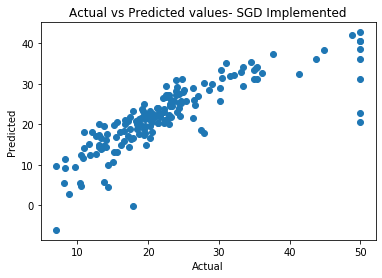

In [117]:
plt.scatter(act_or, pred_or)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted values- SGD Implemented")
plt.show()

## 3. Scikit learn version of SGD

### 3.1 Applying SGD

In [105]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

reg = SGDRegressor(loss='squared_loss',max_iter=100, alpha=0.0001, tol=.0001,learning_rate='invscaling')

reg.fit (X_train_std, Y_train_std)

yhat=reg.predict(X_test_std)

MSE=mean_squared_error(Y_test_std,yhat)

print(f'The MSE for standardized test data using sklearn version of SGD is:{MSE}')

The MSE for standardized test data using sklearn version of SGD is:0.36072161627698773


### 3.2 Converting standardized outputs to original outputs using inverse_transform attribute

In [106]:
yhat_=yhat.reshape(-1,1)
#print(yhat_.shape)
#print(Y_test_std.shape)
pred_or=scaler2.inverse_transform(yhat_)
#print(pred_or)
act_or=scaler2.inverse_transform(Y_test_std)
#print(act_or)
sq_error= [i[0] for i in ((act_or-pred_or)**2)]
#print(sq_error)
MSE=sum(sq_error)/Y_test_std.shape[0]
print(f'The MSE for original test data using sklearn version of SGD is:{MSE}')

The MSE for original test data using sklearn version of SGD is:28.79500383680074


### 3.3 Co-efficients & intercept

In [107]:
coefs=reg.coef_
print(coefs)
w0=reg.intercept_
print('Intercept=',w0)

[-0.13847363  0.08209953 -0.05357241  0.02511937 -0.1476366   0.32158284
 -0.04633332 -0.29991421  0.20889573 -0.12852264 -0.23329494  0.1176353
 -0.37131385]
Intercept= [6.66425325e-05]


### 3.4 Plotting Actual vs Predicted values

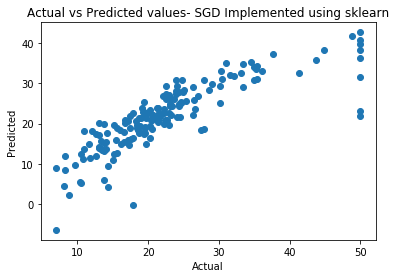

In [109]:
plt.scatter(act_or, pred_or)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted values- SGD Implemented using sklearn")
plt.show()

## 4. Summary

### 4.1 MSE summary

In [118]:
#Ref: http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
    
x = PrettyTable()
x.field_names = ["Implementation type","MSE"]
x.add_row(["Manual", 29.4])
x.add_row(["Sklearn", 28.8])
print(x)

+---------------------+------+
| Implementation type | MSE  |
+---------------------+------+
|        Manual       | 29.4 |
|       Sklearn       | 28.8 |
+---------------------+------+


### 4.2 Co-efficients summary

In [119]:
# creating lists of co-effs for both the versions
man=[0.009558946531683554, -0.13818718767629987, 0.06243946570609928, -0.06653276256328082, 0.033085987060484955, -0.09943414546086045, 0.3517830179893913, -0.05210974376059008, -0.24617355920767672, 0.14098947216684204, -0.0769546176730711, -0.22803779179897943, 0.10347864673326172, -0.34579382098720907]
sk=[6.66425325e-05,-0.13847363,0.08209953,-0.05357241,0.02511937,-0.1476366,0.32158284,-0.04633332,-0.29991421,0.20889573,-0.12852264,-0.23329494,0.1176353,-0.37131385]


In [120]:
# Creating a table in form of data frame
tab = pd.DataFrame(list(zip(man,sk)),index =['Intercept','CRIM','ZN', 'INDUS', 'CHAS', 'NOX', 'RM','AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
 'B', 'LSTAT'],columns =['Manual','Sklearn'])
tab

,Manual,Sklearn
Intercept,0.009559,0.000067
CRIM,-0.138187,-0.138474
ZN,0.062439,0.082100
INDUS,-0.066533,-0.053572
CHAS,0.033086,0.025119
NOX,-0.099434,-0.147637
RM,0.351783,0.321583
AGE,-0.052110,-0.046333
DIS,-0.246174,-0.299914
RAD,0.140989,0.208896
